# Learning to visualize data using a sample Iris bioclim dataset
    - First we need to load python packages to use
    - we use the function import to load
    - the function as lets us assign an abreviation for package
    

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
!pwd  #calls our current directory

/Users/claytonvisger/Desktop/iris


# Step 1 load the data
    - Load in a dataset and save it as a dataframe named 'df 
    - use the .head() function on df to look at the top rows

In [24]:
df = pd.read_csv("Iris_bioclim_val.csv", sep=",")
df.head()

,lon,lat,species,bio_18,bio_13,bio_17,bio_19,bio_14,bio_12,bio_15,...,bio_8,bio_9,bio_6,bio_7,bio_4,bio_5,bio_2,bio_3,bio_16,bio_1
0,-82.736534,29.323601,Iris hexagona SS,587,217,192,274,51,1387,47,...,269,177,58,272,5246,330,136,50,587,206
1,-82.859842,29.474962,Iris hexagona SS,479,176,171,247,41,1155,44,...,267,173,54,275,5306,329,137,49,479,204
2,-82.631494,29.094935,Iris hexagona SS,580,211,190,258,56,1369,46,...,269,181,64,266,5066,330,133,50,580,209
3,-82.757500,29.373056,Iris hexagona SS,589,218,192,277,50,1391,47,...,267,176,57,273,5194,330,137,50,589,206
4,-82.757500,29.373056,Iris hexagona SS,589,218,192,277,50,1391,47,...,267,176,57,273,5194,330,137,50,589,206


# Dealing with duplicates
    - notice rows 3 and 4 are duplicate occurences.  We need to remove these.
The resolution of bioclim layers is ~1sq kilometer. so we don't want multiple points within the same grid square.  Just to be on the conservative side we will round lat/lon to 3 decimal places and remove anything duplicated

In [25]:
df.lon = df.lon.round(3)
df.lat = df.lat.round(3)
df = df.drop_duplicates(subset=['lat','lon'],keep='first')
df.head()

,lon,lat,species,bio_18,bio_13,bio_17,bio_19,bio_14,bio_12,bio_15,...,bio_8,bio_9,bio_6,bio_7,bio_4,bio_5,bio_2,bio_3,bio_16,bio_1
0,-82.737,29.324,Iris hexagona SS,587,217,192,274,51,1387,47,...,269,177,58,272,5246,330,136,50,587,206
1,-82.860,29.475,Iris hexagona SS,479,176,171,247,41,1155,44,...,267,173,54,275,5306,329,137,49,479,204
2,-82.631,29.095,Iris hexagona SS,580,211,190,258,56,1369,46,...,269,181,64,266,5066,330,133,50,580,209
3,-82.758,29.373,Iris hexagona SS,589,218,192,277,50,1391,47,...,267,176,57,273,5194,330,137,50,589,206
6,-83.158,29.611,Iris hexagona SS,349,135,146,203,34,865,42,...,265,168,47,278,5497,325,134,48,349,200


# Now that our dataset is deduplicated we can start to explore the dataset
    -Similair to using .head(), we can use .boxplot() function
        
    -Let's look at the first bioclim variable (column bio_1), and group by species
            

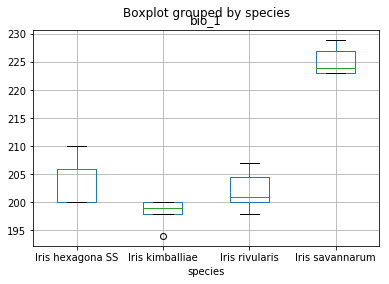

In [4]:
df.boxplot(column='bio_1', by='species')

# Using a For loop to automate graphing
    - We have 19 different variables, so it would be tedius to code each plot
    - We can write a loop that will iterate through each column, adding each as a subplot
    - look at the code comments for details 
            -comments are preceeded by a '#' and will be ignored by python
            -try changing values, and commenting out lines of code to see what happens

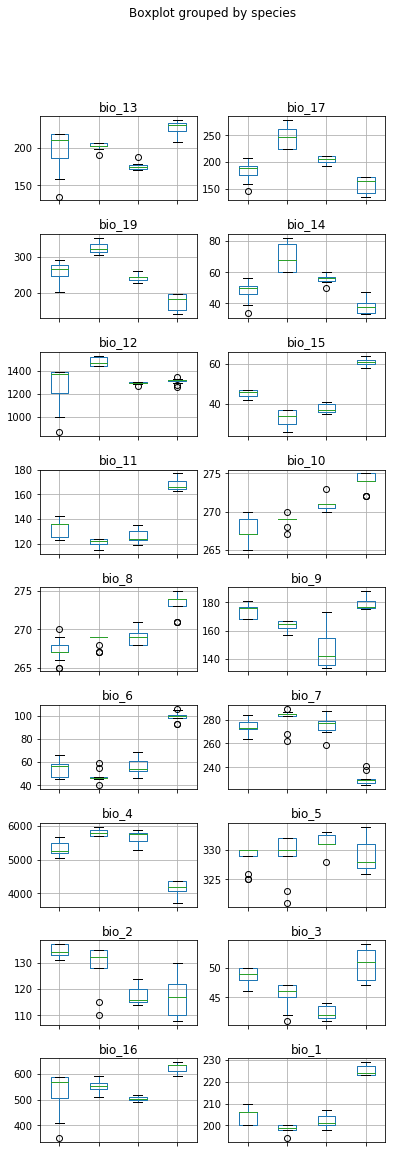

In [12]:
fig1 = plt.figure(figsize=(6,19)) #We create an empty plot and set the dimensions
count=0 # we will make a variable named count to help us below

for i in range(4,len(df.columns)): #Here we loop the variable i from a value of 4 to the total number of columns (23)
    bio = df.columns[i]   #variable saving the name of column number i  (when i = 5 bio = bio_13)
    count += 1  #increase our counter by 1 each iteration through the loop
    ax = fig1.add_subplot(9,2,count) #use our count number to set the subplot position 
    df.boxplot(column=bio, by='species', ax=ax) #plot the subplot
    ax.set_xticklabels([]) #cleaning up extra axis labels - it gets messy labeling all subplots
    ax.set_xlabel('')
fig1.subplots_adjust(hspace=.4) #adjust the spacing
plt.savefig('irisplot.pdf')  #save our final plot as a pdf,  we can add the species labels later

# PCA methods  -- explainations in progress

In [6]:
#split table into data x and species y
X= df.ix[:,3:22].values
Y= df.ix[:,2].values


Standardize the data

In [26]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X.astype(float))
X_std

array([[ 0.75921903,  0.68710699, -0.54151799, ...,  1.05501958,
         0.59578325,  0.08286932],
       [-1.47152168, -1.55634815, -1.07648536, ...,  0.70991971,
        -1.58012079, -0.11716007],
       [ 0.61463398,  0.35879648, -0.59246726, ...,  1.05501958,
         0.45475243,  0.38291341],
       ..., 
       [-0.66597643, -0.62613504, -0.6179419 , ...,  0.01971999,
        -0.79437766, -0.51721886],
       [-2.87606212, -2.48656126, -1.382181  , ...,  0.36481985,
        -2.95013444, -0.51721886],
       [ 0.32546389,  0.13992281, -0.1339238 , ..., -0.32537987,
         0.1726908 , -0.51721886]])

In [28]:
np.cov(X_std.T)

array([[ 1.01449275,  0.96537025, -0.10372106, -0.11242802, -0.19543767,
         0.43374355,  0.47066245,  0.50218909,  0.50976425,  0.65624797,
         0.55319549,  0.49291674, -0.4738749 , -0.47366216,  0.07939236,
        -0.16926475,  0.43594384,  0.9596755 ,  0.5059749 ],
       [ 0.96537025,  1.01449275, -0.16373591, -0.19634657, -0.2078433 ,
         0.40168477,  0.52576139,  0.59510598,  0.51918571,  0.66167596,
         0.65357607,  0.57377976, -0.55532263, -0.5743219 ,  0.06024544,
        -0.16831526,  0.55330078,  0.97275073,  0.59228986],
       [-0.10372106, -0.16373591,  1.01449275,  0.94676752,  0.96860588,
         0.8212128 , -0.91099479, -0.82334518, -0.45510066, -0.42772368,
        -0.53989332, -0.75940325,  0.73356819,  0.85454085, -0.09193997,
         0.2091562 , -0.72597883, -0.22430787, -0.81457284],
       [-0.11242802, -0.19634657,  0.94676752,  1.01449275,  0.89022597,
         0.75119144, -0.92553795, -0.9045395 , -0.66739892, -0.57716366,
        -0.437

In [40]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

eig_vecs


array([[  1.62427309e-01,  -4.20495956e-01,   8.29904931e-02,
          6.19982717e-02,   4.51784117e-01,  -1.16552275e-01,
          9.68384556e-02,   2.02472590e-01,   4.88023414e-01,
         -4.08530342e-01,   2.67816960e-01,   3.77202040e-02,
          7.03562254e-02,   6.67413460e-03,   1.73759107e-01,
          3.15839781e-02,   3.97289834e-02,   4.50312693e-02,
          3.63394689e-14],
       [  1.82533332e-01,  -4.03420350e-01,   1.15575888e-01,
          1.11215774e-01,   1.28621933e-01,   1.05792105e-01,
          6.47966029e-02,  -5.93358587e-01,  -4.87762855e-01,
         -1.07034494e-02,   3.37943264e-01,  -1.36857583e-01,
         -3.78545320e-02,   1.36762928e-01,   1.83080254e-02,
         -4.93598077e-02,  -1.21961173e-03,   1.80373443e-02,
         -3.50263304e-14],
       [ -2.37625666e-01,  -2.80791664e-01,  -1.55605501e-01,
          9.60400706e-02,  -1.82770807e-01,  -5.75359508e-02,
          8.38898226e-02,  -7.94031682e-02,   1.51094344e-01,
          2.5271

In [41]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [42]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
11.6274897827
3.34775100479
2.20119707458
1.11627994065
0.340539946039
0.200848941717
0.0860758803668
0.0320025714023
0.0183836448508
0.0162763914063
0.00495852505104
0.00330132279465
0.00219479861208
0.00116937984729
0.000803923777055
0.000433364165409
0.000183433880249
0.000110073400908
7.93665736947e-17


In [44]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

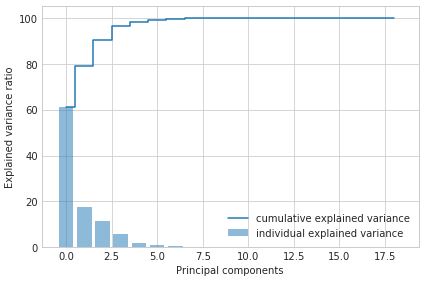

In [46]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(19), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(19), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [48]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(19,1),
                      eig_pairs[1][1].reshape(19,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.16242731 -0.42049596]
 [ 0.18253333 -0.40342035]
 [-0.23762567 -0.28079166]
 [-0.25698873 -0.2451112 ]
 [-0.23487846 -0.25101945]
 [-0.1187098  -0.49207883]
 [ 0.28516397  0.08577745]
 [ 0.29091555  0.01914538]
 [ 0.23124091 -0.11323651]
 [ 0.23469311 -0.18357202]
 [ 0.19524386 -0.08827325]
 [ 0.28683098  0.00742375]
 [-0.28220285 -0.01626643]
 [-0.28916727 -0.04431558]
 [-0.00977545 -0.07800188]
 [-0.14522126 -0.0055516 ]
 [ 0.21095511  0.00872412]
 [ 0.19967275 -0.38157666]
 [ 0.29124207  0.01568918]]


In [65]:
Y = X.dot(matrix_w)

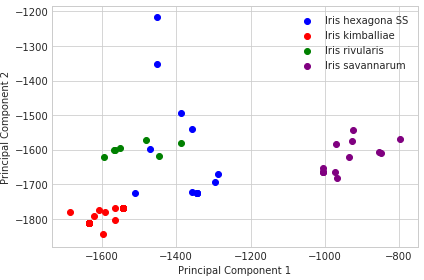

In [66]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris hexagona SS', 'Iris kimballiae', 'Iris rivularis','Iris savannarum'),
                        ('blue', 'red', 'green','purple')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.savefig('irisPCA.pdf')